<a href="https://colab.research.google.com/github/RKDash7/R-K-Dash/blob/main/Q_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training completed.
Routing path found from node 0 to base station: [0, 8, 10]


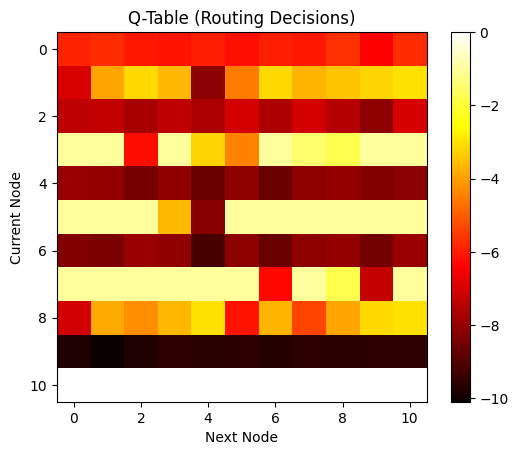

In [27]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Initialize parameters
NUM_NODES = 10  # Number of IoT nodes
BASE_STATION = NUM_NODES  # Index of the base station (node 20)
EPSILON = 0.1  # Exploration rate (10% exploration, 90% exploitation)
ALPHA = 0.1  # Learning rate
GAMMA = 0.9  # Discount factor
EPISODES = 1000  # Number of training episodes

# Create a random adjacency matrix to simulate the connectivity between nodes and the base station
adj_matrix = np.random.choice([0, 1], size=(NUM_NODES + 1, NUM_NODES + 1), p=[0.7, 0.3])
np.fill_diagonal(adj_matrix, 0)  # No self-loop
adj_matrix[BASE_STATION, :] = 1  # Base station is connected to all nodes
adj_matrix[:, BASE_STATION] = 1  # All nodes are connected to the base station

# Create an energy cost matrix (distance or energy to transmit between nodes and the base station)
# Energy costs between nodes or from nodes to the base station are randomly assigned between 1 and 10
energy_cost_matrix = np.random.randint(1, 11, size=(NUM_NODES + 1, NUM_NODES + 1))
np.fill_diagonal(energy_cost_matrix, 0)  # No energy cost for self-loop
energy_cost_matrix[BASE_STATION, :] = np.random.randint(1, 11, NUM_NODES + 1)
energy_cost_matrix[:, BASE_STATION] = np.random.randint(1, 11, NUM_NODES + 1)

# Q-Table: Initialize it to zeros (NUM_NODES + 1 x NUM_NODES + 1)
Q_table = np.zeros((NUM_NODES + 1, NUM_NODES + 1))
re=[]
# Reward function: reward based on energy efficiency (lower cost = higher reward)
def reward(current_node, next_node):
    if adj_matrix[current_node, next_node] == 1:
        energy_cost = energy_cost_matrix[current_node, next_node]
        return -energy_cost  # Negative reward (penalty) for higher energy cost
    else:
        return -10  # High penalty for invalid route (no direct connection)

# Epsilon-greedy policy
def epsilon_greedy_policy(current_node):
    if random.uniform(0, 1) < EPSILON:
        # Exploration: choose a random node (neighbor)
        possible_nodes = [i for i in range(NUM_NODES + 1) if adj_matrix[current_node, i] == 1]
        return random.choice(possible_nodes) if possible_nodes else current_node
    else:
        # Exploitation: choose the best known node (highest Q-value)
        return np.argmax(Q_table[current_node])

# Q-learning process
def train_q_learning():
    for episode in range(EPISODES):
        current_node = random.randint(0, NUM_NODES-1)  # Start at a random IoT node

        # Simulate routing from the current node to the base station
        while current_node!=BASE_STATION:  # Limit the number of steps to avoid infinite loops
            next_node = epsilon_greedy_policy(current_node)  # Choose the next node

            # Get the reward for the chosen action
            r = reward(current_node, next_node)

            # Q-learning formula: Q(current, action) = (1 - alpha) * Q(current, action) + alpha * (reward + gamma * max(Q(next)))
            Q_table[current_node, next_node] = (1 - ALPHA) * Q_table[current_node, next_node] + ALPHA * (r + GAMMA * np.max(Q_table[next_node]))

            current_node = next_node  # Move to the next node
        re.append(r)
    print("Training completed.")

# Testing the learned routing strategy (based on the Q-table)
def test_routing():
    start_node = random.randint(0, NUM_NODES-1)
    current_node = start_node
    route = [current_node]

    while current_node != BASE_STATION:
        next_node = np.argmax(Q_table[current_node])
        if adj_matrix[current_node, next_node] == 0:
            break  # If no valid next node, end the routing
        route.append(next_node)
        current_node = next_node

    return route

# Visualizing the learned Q-values (example visualization of routing performance)
def visualize_q_table():
    plt.imshow(Q_table, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title("Q-Table (Routing Decisions)")
    plt.xlabel("Next Node")
    plt.ylabel("Current Node")
    plt.show()

# Main execution
train_q_learning()  # Train the model
route = test_routing()  # Test the learned routing strategy

print(f"Routing path found from node {route[0]} to base station: {route}")

visualize_q_table()  # Visualize the learned Q-values in the Q-table


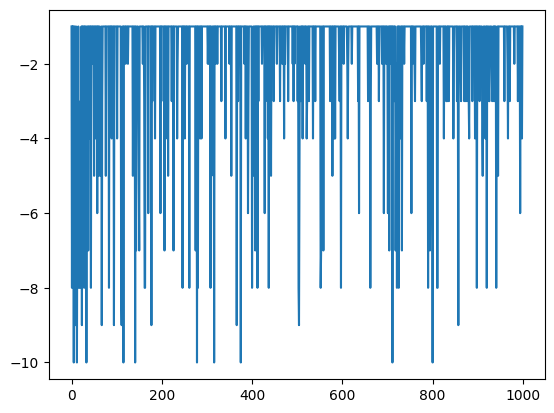

In [26]:
it=np.arange(EPISODES)
plt.plot(it,re)
plt.show()

In [15]:
!pip install --upgrade networkx

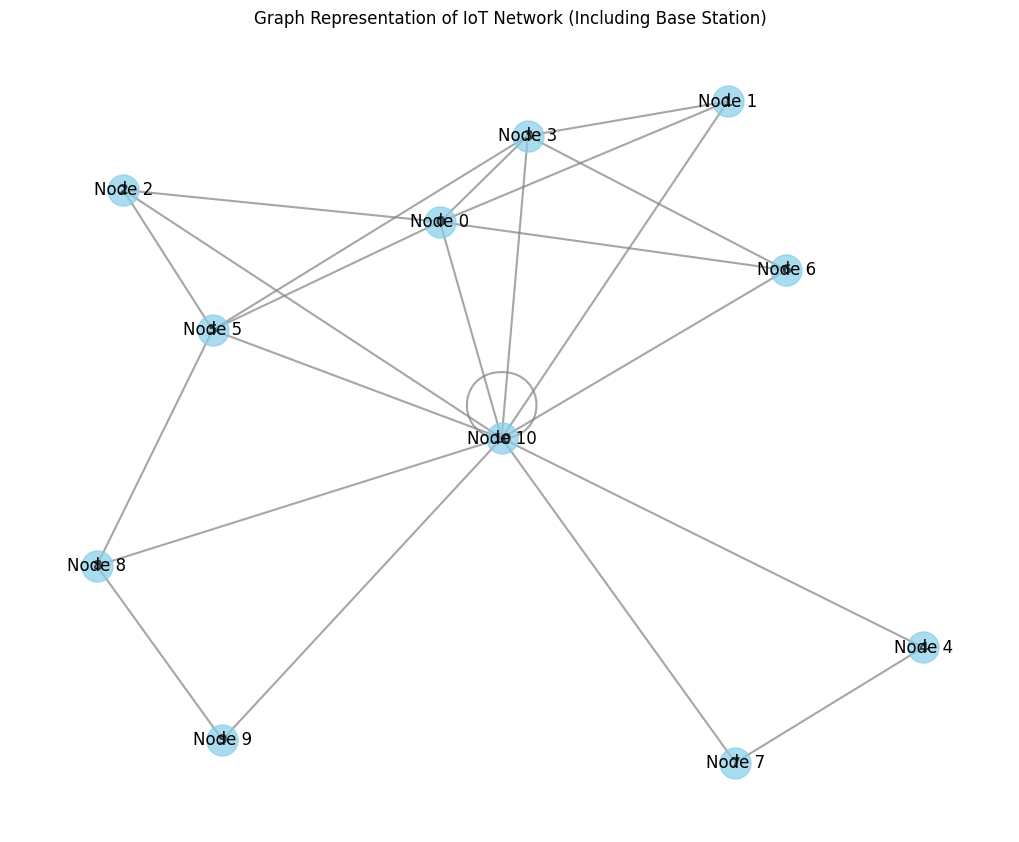

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Example Adjacency Matrix for 20 IoT nodes and 1 base station
NUM_NODES = 10
BASE_STATION = NUM_NODES  # Index of the base station
adj_matrix = np.random.choice([0, 1], size=(NUM_NODES + 1, NUM_NODES + 1), p=[0.7, 0.3])
np.fill_diagonal(adj_matrix, 0)  # No self-loop
adj_matrix[BASE_STATION, :] = 1  # Base station is connected to all nodes
adj_matrix[:, BASE_STATION] = 1  # All nodes are connected to the base station

# Convert the adjacency matrix into a networkx graph
# Use `from_numpy_array` instead of `from_numpy_matrix` for NetworkX 2.x and later
G = nx.from_numpy_array(adj_matrix)

# Plot the graph
plt.figure(figsize=(10, 8))

# Layout: use spring layout to position nodes
pos = nx.spring_layout(G, seed=42)  # Fixed seed for reproducibility

# Draw the graph
nx.draw(
    G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10,
    font_weight='bold', edge_color='gray', width=1.5, alpha=0.7
)

# Adding labels for the nodes (optional)
labels = {i: f"Node {i}" for i in range(NUM_NODES + 1)}
nx.draw_networkx_labels(G, pos, labels, font_size=12)

# Set the title
plt.title("Graph Representation of IoT Network (Including Base Station)")

# Show the plot
plt.show()